# Learning Outcomes
1) image histogram : distribution grayscale values
2) Enhance the contrast: 2 ways: scalar multiplication on image, histogram equalization and its variant called CLAHE (do before edge detection)
3) Thresholding: 2 ways: global thresholding and otsu thresholding
4) Morphological operations (limit our discussion on binary image)
5) Color spaces: HSV color space used to perform color based segmentation

# Set up

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
from util_func import *

# Image Histogram
Purpose:
1) know the distribution of the grayscale values /pixel (grayscale image) (do not take over the threshlod) (image histogram), so we strectch the histogram but without changing the shape of the histogram. 50->0 , 200->255 (in histogram equalization)
2) Use case (use for): histogram equalization, build image search engine by using the image histogram (but need to include color histogram)


In [ ]:
img = cv.imread("images/lena.jfif")
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [ ]:
#There are 2 ways to compute the histogram
#[0]->grayscale, [256]->256 bins(0-255)
%timeit hist = cv.calcHist([gray],[0],None,[256],[0,256])
%timeit hist , _ =np.histogram(gray.flatten(),256)

In [ ]:
#get histogram from the channel

import matplotlib.pyplot as plt

hist = cv.calcHist([gray],[0],None,[256],[0,256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.plot(hist)
plt.xlim([0,255])
plt.show()

In [ ]:
#get the histogram fro every channel

channels=cv.split(img)
colors=("b","g","r")

plt.figure()
plt.title("color channel histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")

for ch, color in zip(channels,colors):
    hist = cv.calcHist([gray],[0],None,[256],[0,256])
    plt.plot(hist,color=color,label=color)
    
plt.xlim([0,255])
plt.legend()
plt.show()

In [ ]:
# 0 -> grayscale , equalization works for the grayscale image
img=cv.imread("images/low_contrast_img.jfif", 0)
show_img("low contrast",img)

In [ ]:
#histogram for this image
hist = cv.calcHist([img],[0],None,[256],[0,256])

#cdf
cdf = hist.cumsum()
cdf_norm=cdf*hist.max()/cdf.max()

plt.figure() #optional
plt.plot(cdf_norm,color="b")
#image need to flatten it
plt.hist(img.flatten(),256,color="r")
plt.title("cdf + histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.legend(("cdf","histogram"))
plt.xlim([0,255])
plt.show()



#sketch it by not changing the shape enchance the contrast 

In [ ]:
#histogram equalization
#sketch it by not changing the shape enchance the contrast 

eq = cv.equalizeHist(img)

hist = cv.calcHist([img],[0],None,[256],[0,256])

#cdf
cdf = hist.cumsum()
cdf_norm=cdf*hist.max()/cdf.max()

plt.figure() #optional
plt.plot(cdf_norm,color="b")
#image need to flatten it
plt.hist(img.flatten(),256,color="r")
plt.title("after histogram equalization")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.legend(("cdf","histogram"))
plt.xlim([0,255])
plt.show()

In [ ]:
# CLAHE
# need to set tile (8x8-10x10) and cliplimit (3-5)
img=cv.imread("images/dog1.jfif",0)

#eqaulization
eq=cv.equalizeHist(img)

#CLAHE
clahe=cv.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
dst=clahe.apply(img)

cv.imshow("original",img)
cv.imshow("equalization",eq)
show_img("clahe",dst)

# Exercise:

# Thresholding
Global t. => set "T"
1) simplest form of global thresholding is called binary thresholding.

In [ ]:
#simple global thresholding
#different types of thresholding

[i for i in dir(cv) if i.startswith("THRESH")]

In [ ]:
#eg for different thresholding types

img=np.fromfunction(lambda i, j:j,(50,256),dtype=np.uint8) #??

def trackbar(x):
    _, img1 = cv.threshold(img,x,255,cv.THRESH_BINARY)
    _, img2 = cv.threshold(img,x,255,cv.THRESH_BINARY_INV)
    _, img3 = cv.threshold(img,x,255,cv.THRESH_TRUNC)
    _, img4 = cv.threshold(img,x,255,cv.THRESH_TOZERO)
    _, img5 = cv.threshold(img,x,255,cv.THRESH_TOZERO_INV)
    
    cv.imshow("window",np.vstack((img1,img2,img3,img4,img5)))
    
cv.namedWindow('window')
cv.createTrackbar('threshold', 'window', 100, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()
    
    

# Simple global threshold vs Otsu thresholding

In [ ]:
img=cv.imread("images/noisy.jfif",0) #ROI is darker, need to change it to white
show_img("noisy",img)

In [ ]:
# Otsu thresholding -> select "T" for us automatically , can separate foreground and background
# Otsu thresholding -> works best if the histogram is bimodel distribution

#apply 3 approaches: 1. global threshold, 2. otsu threshold, 3. blurring + otsu

# 1: 127:threshold
th1 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)[1]

# 2: 0:no need set threshold
th2 = cv.threshold(img,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

# 3:
blur=cv.GaussianBlur(img,(5,5),0) #blur the image 1st
th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] #generate a bimodel distribution histogram

imgs=[img,0,th1,
     img,0,th2,
     blur,0,th3]

titles=("original","histogram","global threshold",
       "orginal","","otsu threshold",
       "blur","","otsu threshold")

for i in range(3):
    plt.subplot(3,3,3*i+1),plt_img(imgs[3*i],title=titles[3*i])
    plt.subplot(3,3,3*i+2),plt.hist(imgs[3*i].flatten(),256),
    plt.title(titles[3*i+1])
    plt.subplot(3,3,3*i+3),plt_img(imgs[3*i+2],title=titles[3*i+2])
    
plt.show()

# Morphological Operations
Morphological operations are image processing techniques used to analyze and manipulate the shape and structure of objects within an image. These operations are primarily employed in binary or grayscale images and are commonly used in tasks such as image segmentation, noise reduction, feature extraction, and more. Morphological operations are based on the interaction between an input image and a small, predefined kernel (also known as a structuring element) that moves through the image pixel by pixel.
works on binary image, 4 ways to do operations (angle point is the center point of the structuring element or kernel) 
1) Erosion (angle point look at the neighbour num, if there is 0, angle point will change to 0 : if there is no 0, remain unchanged)
2) Dilution (angle point look at the neighbour num, if there is 255, angle point will change to 255)
3) Opening (Erosion+Dilution) *sequence important -remove small white spots (noise) -break join
4) Closing (Dilution+Erosion) -fill in small hole.

In [ ]:
# Erosion

#kernel is needed
kernel = np.ones((3,3),np.uint8)

#erosion
erosion=cv.erode(th3,kernel,iterations=1)

#combined
img_combined=np.hstack((th3,erosion))

show_img("erosion",img_combined)

In [ ]:
# trackbar: function and while loop

def nothing(x):
    pass

wn="window"
cv.namedWindow(wn)
cv.createTrackbar("size",wn,3,10,nothing)
cv.createTrackbar("iter",wn,3,10,nothing)

while (1):
    #retrieve the size and the iteration number
    size=cv.getTrackbarPos("size",wn)
    if size<3:
        size=3
        
    iteration=cv.getTrackbarPos("iter",wn)
    if iteration<1:
        iteration=1
    kernel=np.ones((size,size),dtype=np.uint8)
    
    #closing 
    closing=cv.morphologyEx(th3,cv.MORPH_CLOSE,kernel,iterations=iteration)
    
    
    cv.imshow("wn",closing)
    k=cv.waitKey(1) & 0xFF
    if k==27:
        break
    
cv.destroyAllWindows()

In [ ]:
#kernel not just np.ones, can also be this...
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

# Color Spaces
1) GRB/BGR (prevalent images formats)
2) HSV (hue,saturation,value) *hue encodes color (angular,0-359),In OpenCV,0-179) *saturation implies color purity (higher, higher) *value=brightness (higher, more light ; 0, dark/black)
BGR->RBG->HSV
3) L\*a\*b: 
- L denotes brightness / luminance while a and b are color channels.
- perceptual uniformity

In [ ]:
#sharpen image using L*a*b
#1. change color space (BGR->L*A*B)
#2. sharpen only "L" , merge back , convert back to BGR

img=cv.imread("images/lena.jfif")

img_lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)

l,a,b=cv.split(img_lab)

#process just the L channel
#sharpen using kernel
kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
l_sharpen=cv.filter2D(l,-1,kernel)

#merge 
sharpen=cv.merge((l_sharpen,a,b))

#change back to BGR
sharpen=cv.cvtColor(sharpen,cv.COLOR_Lab2BGR)

cv.imshow("original",img)
show_img("sharpen",sharpen)

# Demo on color based segmentation

In [14]:
#RGB
img=cv.imread("images/color_space/pant.jfif")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

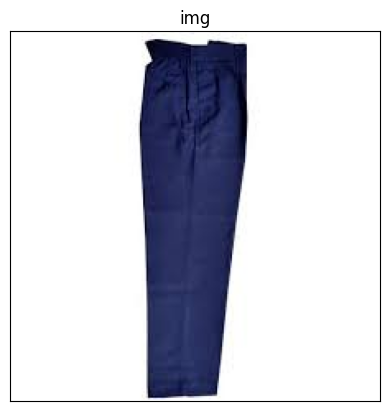

In [15]:
plt_img(img,"img")

In [16]:
# import dependencies 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

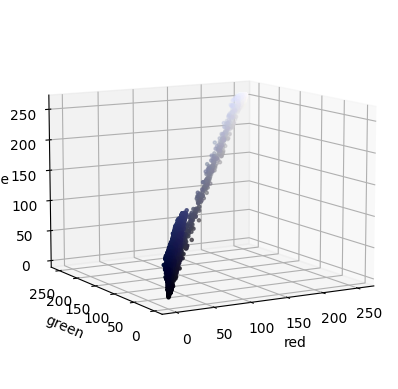

In [17]:
# split the image into separate channels
r,g,b = cv.split(img)

#set up 3D figure
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")

#pixel colors read as argument for the scatter plot
pixel_colors=img.reshape((-1,3))
#fit the norm and use in the pixel_colors
norm=colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors=norm(pixel_colors).tolist()

axis.scatter(r.ravel(),g.ravel(),b.ravel(),
            facecolors=pixel_colors,marker=".")

axis.view_init(elev=10,azim=240)
axis.set_xlabel("red")
axis.set_ylabel("green")
axis.set_zlabel("blue")
plt.show()

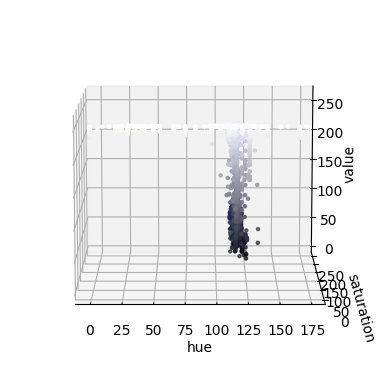

In [18]:
img_hsv=cv.cvtColor(img,cv.COLOR_RGB2HSV)

h,s,v = cv.split(img_hsv)

#set up 3D figure
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")


axis.scatter(h.ravel(), s.ravel(), v.ravel(), 
            facecolors=pixel_colors, marker=".")

axis.view_init(elev=10,azim=270) # graph rotate
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

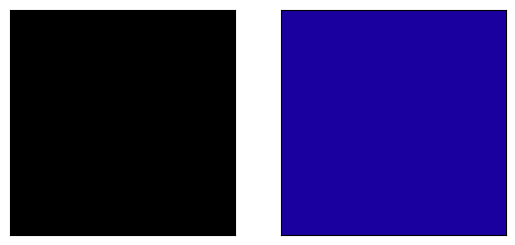

In [19]:
#get color segmentation (get the threshold)
#get the proper range low and high blue
blue_low=(85,90,0)
blue_high=(125,255,160)

square1=np.full((10,10,3),blue_low,dtype=np.uint8)
square2=np.full((10,10,3),blue_high,dtype=np.uint8)

plt.subplot(121),plt_img(cv.cvtColor(square1,cv.COLOR_HSV2RGB))
plt.subplot(122),plt_img(cv.cvtColor(square2,cv.COLOR_HSV2RGB))
plt.show()

(<Axes: title={'center': 'segmentation result'}>, None)

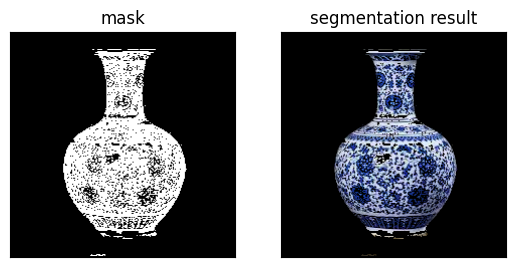

In [22]:
#get color segmentation (get the threshold)
#color based segmentation

mask=cv.inRange(img_hsv,blue_low,blue_high)
res=cv.bitwise_and(img,img,mask=mask)
plt.subplot(121),plt_img(mask,title="mask")
plt.subplot(122),plt_img(res,title="segmentation result")

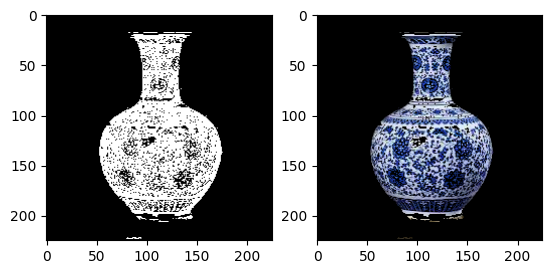

In [23]:
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()


# Exercise:
1) define a color segmentation function
2) image list, result list (corresponding)

In [25]:
img=cv.imread("images/color_space/pant.jfif)
img_hsv=cv.cvtColor(img,cv.COLOR_RGB2HSV)

h,s,v = cv.split(img_hsv)
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()


SyntaxError: unterminated string literal (detected at line 1) (3027258930.py, line 1)

In [26]:
#default is smooth the image
def color_seg(img,color_low,color_high,smooth=True):
    """Args:
    img:source image (RGB)
    color_low and color_high are tuple of colors
    smooth is boolean (blurring or not)"""
    ori_img=img.copy()
    if smooth:
        img=cv.GaussianBlur(img,(5,5),0)
    
    #change the color space from RGB to HSV
    img_hsv =cv.cvtColor(img,cv.COLOR_RGB2HSV)
    
    #segmentation
    #create mask and later bitwise
    mask=cv.inRange(img_hsv,color_low,color_high)
    #Opening #remove any noise
    mask=cv.erode(mask,None,iterations=2)
    mask=cv.dilate(mask,None,iterations=2)
    
    #combine mask and ori_img
    return cv.bitwise_and(ori_img,ori_img,mask=mask)

#put all images in a list
imgs=[]

for i in range(1,6):
    img=cv.imread(cv.samples.findFile(f"images/color_space/pant{i}.jfif"))
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)
    
#perform color segmentation #blue_low and blue_high is already get just now
res=[color_seg(im,blue_low,blue_high) for im in imgs]


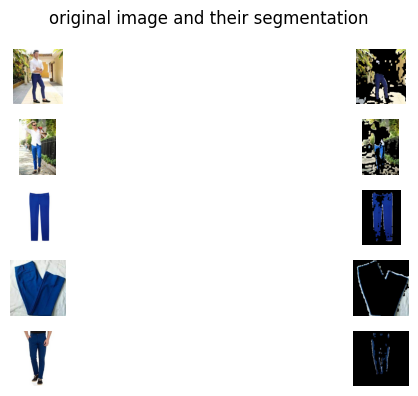

In [27]:
fig,ax=plt.subplots(5,2,figsize=(10,4))

for i in range(5):
    #print out original image
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    #print out the result
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("original image and their segmentation")
plt.tight_layout()
plt.show()

# Exercises:

In [ ]:
#Q1

img = cv.imread("images/boat.jpg")

# convert image to grayscale
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Otsu's Thresholding is a method used to automatically determine an optimal threshold value for image binarization
# pixels are classified into two categories based on their intensity values (e.g., foreground and background)
# It creates a clear distinction between the object of interest and the background.
# apply Otsu Thresholding:
thresholded_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

# find the contours # return a list of contour
boundingbox, _ = cv.findContours(thresholded_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# draw the bounding box
for contour in boundingbox:
    area = cv.contourArea(contour)
    # adjust threshold
    if area > 100:  # if the
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
cv.imshow('Image with Bounding Boxes', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
#Q2

# Load the image in grayscale
img = cv.imread("images/leaf.jfif", 0)

# Apply binary thresholding
_, threshold = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)

# Callback function for trackbars
def nothing(x):
    pass

# Create a named window
wn = "Morphological Transformations"
cv.namedWindow(wn)

# Create trackbars for kernel size and iteration count
cv.createTrackbar("Kernel Size", wn, 1, 10, nothing)
cv.createTrackbar("Iterations", wn, 1, 10, nothing)

while True:
    # Get current values from the trackbars 
    size = cv.getTrackbarPos("Kernel Size", wn)
    iteration = cv.getTrackbarPos("Iterations", wn)
    
    # Ensure minimum size and iteration values
    if size < 1:
        size = 1
    if iteration < 1:
        iteration = 1
    
    # Create a square kernel of the specified size
    square_kernel = np.ones((size, size), dtype=np.uint8)
    
    # Apply morphological operations
    erosion = cv.erode(threshold, square_kernel, iterations=iteration)
    dilation = cv.dilate(threshold, square_kernel, iterations=iteration)
    opening = cv.morphologyEx(threshold, cv.MORPH_OPEN, square_kernel, iterations=iteration)
    closing = cv.morphologyEx(threshold, cv.MORPH_CLOSE, square_kernel, iterations=iteration)
    
    # Stack the images side by side for visualization
    combined_img = np.hstack((erosion, dilation, opening, closing))
    
    # Display the combined image
    cv.imshow(wn, combined_img)
    
    # Check for the 'Esc' key to exit
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

# Release resources and close the window
cv.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'Morphological Transformations' in function 'cvGetTrackbarPos'


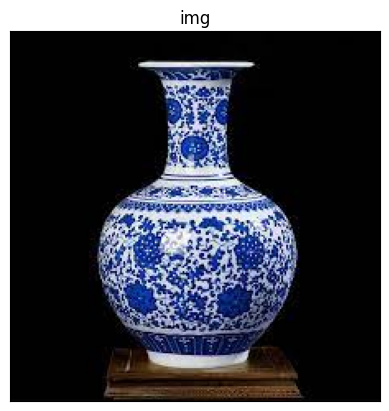

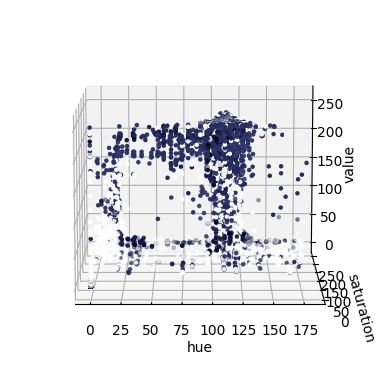

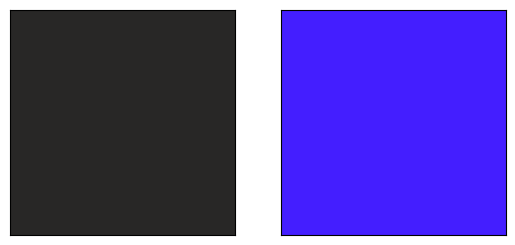

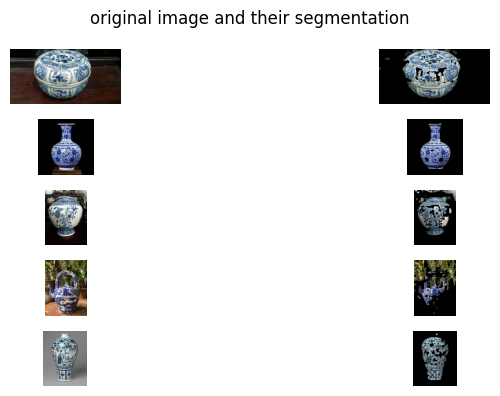

In [28]:
#Q3

#img = cv.imread("images/leaf.jfif", 0)

#load image
img = cv.imread("images/color_space/porcelain2.jfif")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt_img(img,"img")

img_hsv=cv.cvtColor(img,cv.COLOR_RGB2HSV)

h,s,v = cv.split(img_hsv)

#set up 3D figure
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")


axis.scatter(h.ravel(), s.ravel(), v.ravel(), 
            facecolors=pixel_colors, marker=".")

axis.view_init(elev=10,azim=270) # graph rotate
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

blue_low = (20, 15, 40)
blue_high = (125, 225, 255)

square1 = np.full((10,10,3),blue_low,dtype=np.uint8)
square2 = np.full((10,10,3),blue_high,dtype=np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1,cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2,cv.COLOR_HSV2RGB))
plt.show()

#default is smooth the image
def color_seg(img,color_low,color_high,smooth=True):
    """Args:
    img:source image (RGB)
    color_low and color_high are tuple of colors
    smooth is boolean (blurring or not)"""
    ori_img=img.copy()
    if smooth:
        img=cv.GaussianBlur(img,(5,5),0)
    
    #change the color space from RGB to HSV
    img_hsv =cv.cvtColor(img,cv.COLOR_RGB2HSV)
    
    #segmentation
    #create mask and later bitwise
    mask=cv.inRange(img_hsv,color_low,color_high)
    #Opening #remove any noise
    mask=cv.erode(mask,None,iterations=2)
    mask=cv.dilate(mask,None,iterations=2)
    
    return cv.bitwise_and(ori_img,ori_img,mask=mask)

#put all images in a list
imgs=[]

for i in range(1,6):
    img=cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)
    
#perform color segmentation #blue_low and blue_high is already get just now
res=[color_seg(im,blue_low,blue_high) for im in imgs]

fig,ax=plt.subplots(5,2,figsize=(10,4))

for i in range(5):
    #print out original image
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    #print out the result
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("original image and their segmentation")
plt.tight_layout()
plt.show()